In [8]:
import hcp_utils as hcp
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../PyConn')

from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres

In [9]:
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

In [10]:
grad1 = np.load('/Users/VictoriaShevchenko/Documents/PhD/COST/anat/aligned-200gradients-sub-51902-rest--fsLR_den-91k.npy')[0]
from austin_utils import save_gifti
save_gifti(grad1[:, 0][:32492], '/Users/VictoriaShevchenko/Documents/PhD/COST/anat/grad1-L-sub-51902')
save_gifti(grad1[:, 0][32492:], '/Users/VictoriaShevchenko/Documents/PhD/COST/anat/grad1-R-sub-51902')
save_gifti(grad1[:, 1][:32492], '/Users/VictoriaShevchenko/Documents/PhD/COST/anat/grad2-L-sub-51902')
save_gifti(grad1[:, 1][32492:], '/Users/VictoriaShevchenko/Documents/PhD/COST/anat/grad2-R-sub-51902')


In [13]:
group_grads = np.load('/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradients.npy').T
save_gifti(group_grads[0][:32492], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient1_L')
save_gifti(group_grads[0][32492:], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient1_R')

save_gifti(group_grads[1][:32492], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient2_L')
save_gifti(group_grads[1][32492:], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient2_R')

save_gifti(group_grads[2][:32492], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient3_L')
save_gifti(group_grads[2][32492:], '/Users/VictoriaShevchenko/Documents/PhD/COST/gradients/COST_group_gradient3_R')

In [12]:
group_grads.shape

(64984, 200)

In [7]:
64984/2

32492.0

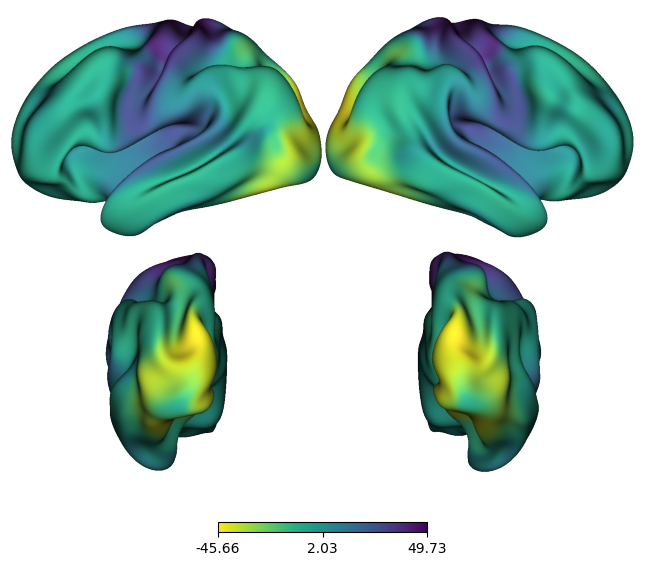

In [8]:
grad1_plot = Plot(lh, rh, size=(800, 600), zoom = 1.7, views=['lateral', 'posterior'])
grad1_plot.add_layer({'left': grad1[:32492], 'right': grad1[32492:]}, cbar=True, cmap="viridis_r")

fig = grad1_plot.build()


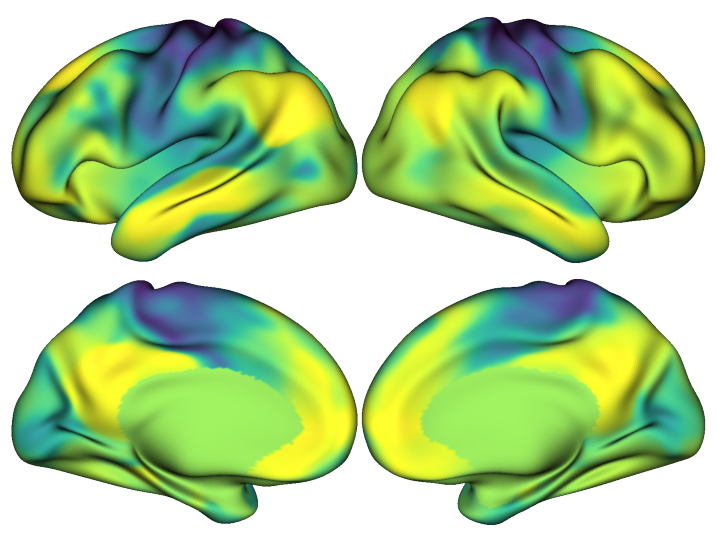

In [25]:
grad1_plot = Plot(lh, rh, size=(800, 600), zoom = 1.7)
grad1_plot.add_layer({'left': grad1[:32492], 'right': grad1[32492:]}, cbar=False, cmap="viridis_r")

fig = grad1_plot.build()

_________________________________________

In [6]:
transmodal_indices.sort()

In [7]:
transmodal_indices

array([    0,     3,    11, ..., 32463, 32464, 32470])

In [4]:
labels = nib.load("/Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.32k.L.label.gii")

In [5]:
sys.path.append('../../surfdist')
import surfdist as sd
from surfdist import viz, load, utils, analysis
import gdist

surfL = nib.load("/Users/VictoriaShevchenko/Documents/PhD/COST/anat/sub-51902_hemi-L_inflated.32k_fs_LR.surf.gii")
nodes = surfL.agg_data('NIFTI_INTENT_POINTSET')
triangles = surfL.agg_data('NIFTI_INTENT_TRIANGLE')
surf = (nodes, triangles)

destrieux = nib.load("/Users/VictoriaShevchenko/Documents/PhD/HCP/surfaces/fsLR/destrieux-labels_den-32k_hemi-L.label.gii").darrays[0].data
a1_vrtx = np.where(destrieux == 32)[0]
calcarine_vrtx = np.where(destrieux == 41)[0]

transmodal_indices = grad1[:, 1][:32492][:int(len(grad1)*0.1)]
angG = np.where(destrieux == 24)[0]
dist = analysis.dist_calc(surf, np.where(labels.darrays[0].data != 0)[0], a1_vrtx, maxDist = 12.5)


In [ ]:
np.arange(labels)

In [7]:
np.unique(dist)

array([ 0.        ,  0.89204107,  1.03906751,  1.04587212,  1.07701429,
        1.14086719,  1.15561514,  1.20533333,  1.98991704,  2.17746317,
        2.17904847,  2.20004898,  2.20759976,  2.25865841,  2.38746419,
        3.21734807,  3.255784  ,  3.32241059,  3.35575504,  3.40617164,
        3.43425095,  3.47291187,  3.48590516,  3.71123981,  3.74077838,
        3.85129544,  3.99435146,  4.0365394 ,  4.07109025,  4.20676558,
        4.24046871,  4.25945176,  4.28499999,  4.44432671,  4.49115121,
        4.63493343,  4.64753609,  4.80705305,  5.00626743,  5.02162145,
        5.07820659,  5.09994824,  5.13724849,  5.15750334,  5.38031347,
        5.41949149,  5.42680193,  5.53469156,  5.65061475,  5.72405806,
        5.73835727,  5.75247707,  5.80077312,  5.87886052,  5.88058349,
        5.91585275,  5.99302285,  5.9969871 ,  6.01965837,  6.07292107,
        6.0915505 ,  6.16864199,  6.21226438,  6.40618911,  6.42910978,
        6.43362725,  6.64546259,  6.65135652,  6.68385722,  6.84

In [12]:
np.unique(dist)

array([0.        , 0.89204107])

In [9]:
analysis.calc_roi_dist(surf, np.where(labels.darrays[0].data != 0)[0], a1_vrtx, angG, dist_type = "max")

73.83499823549901

In [8]:
shortest_dist = analysis.shortest_path(surf, np.where(labels.darrays[0].data != 0)[0], a1_vrtx, angG)

In [9]:
shortest_dist

array([19849, 21340, 21325, 21309, 21292, 21274, 21255, 21235, 21214,
       21192, 21169, 21145, 21120, 21094, 21067, 21039, 21010, 20980,
       20949, 20917, 20884, 20850, 20815, 20779, 20742, 20704, 20665,
       20625, 20584, 20542, 20499, 20455, 20410, 20364, 20317, 20269,
       20220, 20170, 20119, 20067, 20014, 19960, 19905, 10161, 10160,
       10159])

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

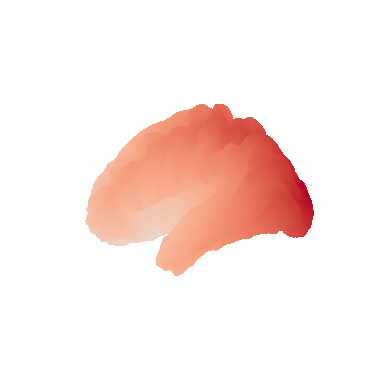

In [11]:
from surfdist import viz
viz.viz(nodes, triangles, dist, cmap = 'coolwarm', azim=180)


In [38]:
surf.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data.shape

(32492, 3)

In [25]:
transmodal_indices = np.argsort(grad1[:, 1][:32492])[:int(len(grad1)*0.1)]

In [27]:
len(indices)

6498

In [4]:
dataset.clean_signal(subject = '51218', surf = True)

[     global_signal          csf  white_matter   trans_x  trans_x_derivative1  \
 0      4831.071624  3159.562125   3583.490326  0.000669             0.000148   
 1      4786.230893  3131.243745   3582.957729  0.000803             0.000134   
 2      4757.152570  3122.270636   3579.896497  0.000760            -0.000042   
 3      4742.832313  3118.820926   3579.471439  0.000813             0.000053   
 4      4733.246417  3112.160007   3584.256363  0.003323             0.002510   
 ..             ...          ...           ...       ...                  ...   
 444    4722.189910  3107.875918   3581.410501  0.065084             0.000498   
 445    4720.611393  3103.725567   3577.888801  0.066377             0.001293   
 446    4720.406171  3100.247623   3582.521888  0.074139             0.007762   
 447    4719.150174  3093.223381   3581.161616  0.074563             0.000424   
 448    4716.382504  3090.863640   3580.454740  0.066931            -0.007632   
 
      trans_x_derivative1_